# check the resutls from RocketClassifier

In [2]:
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

from param import *

sns.set_theme(style="whitegrid")
output_dir = ParamDir().output_dir
datalist = ParamDir().data_path_list

## Unbalanced Segment Data

Text(0, 0.5, 'accuracy')

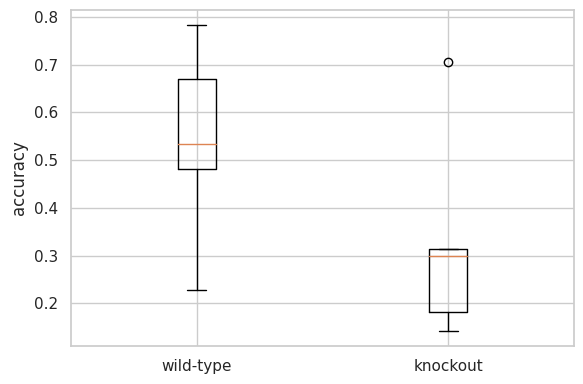

In [2]:
fig, ax = plt.subplots(figsize=(6,4), tight_layout = True, sharey=True)

accu_KO, accu_WT = [], []
for m_id, data_dir in enumerate(datalist):
    data_name = str(data_dir).split('/')[-1]
    with open(ParamDir().output_dir/data_name/(f"tsc_train_rocket.pickle"),"rb") as f:
        results = pickle.load(f)
    accu = np.sum((results["y_test"]==results["y_pred"]))/len(results["y_pred"])
    if "KO" in data_name:
        accu_KO.append(accu)
    else:
        accu_WT.append(accu)


ax.boxplot([accu_WT, accu_KO])
ax.set_xticklabels(['wild-type', 'knockout'])
ax.set_ylabel("accuracy")


## Balanced Threshold Based Segment Data

Text(0.5, 1.0, 'Rocket Transform')

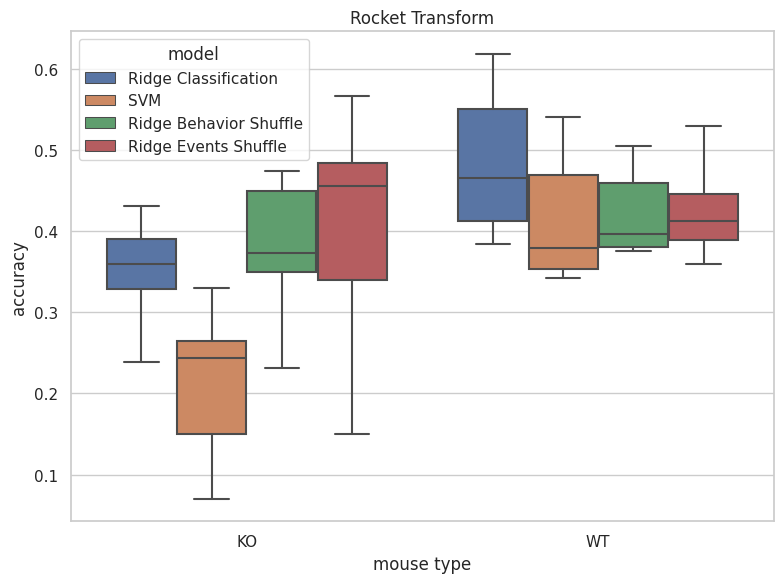

In [6]:
fig, ax = plt.subplots(figsize=(8,6), tight_layout = True, sharey=True)
file_model = [
    ("tsc_train_rocket_threshold_segment_False", "Ridge Classification"),
    ("tsc_train_rocket_SVM_threshold_segment_False", "SVM"),
    # ("tsc_train_rocket_Softmax_threshold_segment_False", "Softmax"),
    ("tsc_train_rocket_Ridge_threshold_segment_behavior shuffling", "Ridge Behavior Shuffle"),
    ("tsc_train_rocket_Ridge_threshold_segment_events shuffling", "Ridge Events Shuffle"),
]
accu_list = []
for file_name, model in file_model:
    for m_id, data_dir in enumerate(datalist):
        data_name = str(data_dir).split('/')[-1]
        with open(ParamDir().output_dir/data_name/(f"{file_name}.pickle"),"rb") as f:
            results = pickle.load(f)
        accu = np.mean(results["scores"])
        if "KO" in data_name:
            accu_list.append((accu, "KO", model))
        else:
            accu_list.append((accu, "WT", model))

df = pd.DataFrame(accu_list, columns=["score", "mouse type", "model"])
sns.boxplot(x="mouse type", y ="score", hue="model", data=df, ax=ax)
ax.set_ylabel("accuracy")
# ax.legend(bbox_to_anchor=(.3, 1.2))
ax.set_title("Rocket Transform")
